In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option("display.max_columns",None)
#pd.pandas.set_option("display.max_rows",None)

In [2]:
data=pd.read_csv("wine.csv")
data

FileNotFoundError: [Errno 2] No such file or directory: 'wine.csv'

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:
data.isnull().sum()

In [ ]:
numerical_features=[feature for feature in data.columns if data[feature].dtype!='object']

print("Number of Numeric Variables ",len(numerical_features))
data[numerical_features].head(5)

In [ ]:
data.columns

In [ ]:
discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25 ]



continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Total Continuous Variables {}".format(len(continuous_feature)))

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data.Label=label_encoder.fit_transform(data.Label)
data

In [3]:
data2=data.copy()
for feature in continuous_feature:
    dataset2=data2.copy()
    dataset2[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

NameError: name 'data' is not defined

In [4]:
dataset2

NameError: name 'dataset2' is not defined

In [5]:
for feature in continuous_feature:
        q1=dataset2[feature].quantile(0.25)
        q3=dataset2[feature].quantile(0.75)
        iqr=q3-q1
        lower_lim=q1-1.5*iqr
        upper_lim=q3+1.5*iqr
        
        dataset2=dataset2[(dataset2[feature]<=upper_lim) & (dataset2[feature]>=lower_lim)]
    



NameError: name 'continuous_feature' is not defined

In [6]:
dataset2

NameError: name 'dataset2' is not defined

In [15]:
feature_scale=[feature for feature in dataset2.columns]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset2[feature_scale])

MinMaxScaler()

In [16]:
dataset2

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyannis,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Label
0,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,0
1,12.00,3.43,2.00,19.0,87,2.00,1.64,0.37,1.87,1.28,0.93,3.05,564,1
2,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105,0
3,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035,0
4,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,12.37,1.21,2.56,18.1,98,2.42,2.65,0.37,2.08,4.60,1.19,2.30,678,1
174,13.90,1.68,2.12,16.0,101,3.10,3.39,0.21,2.14,6.10,0.91,3.33,985,0
175,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
176,12.07,2.16,2.17,21.0,85,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378,1


In [35]:
dataset2.Label.value_counts()

1    61
0    57
2    43
Name: Label, dtype: int64

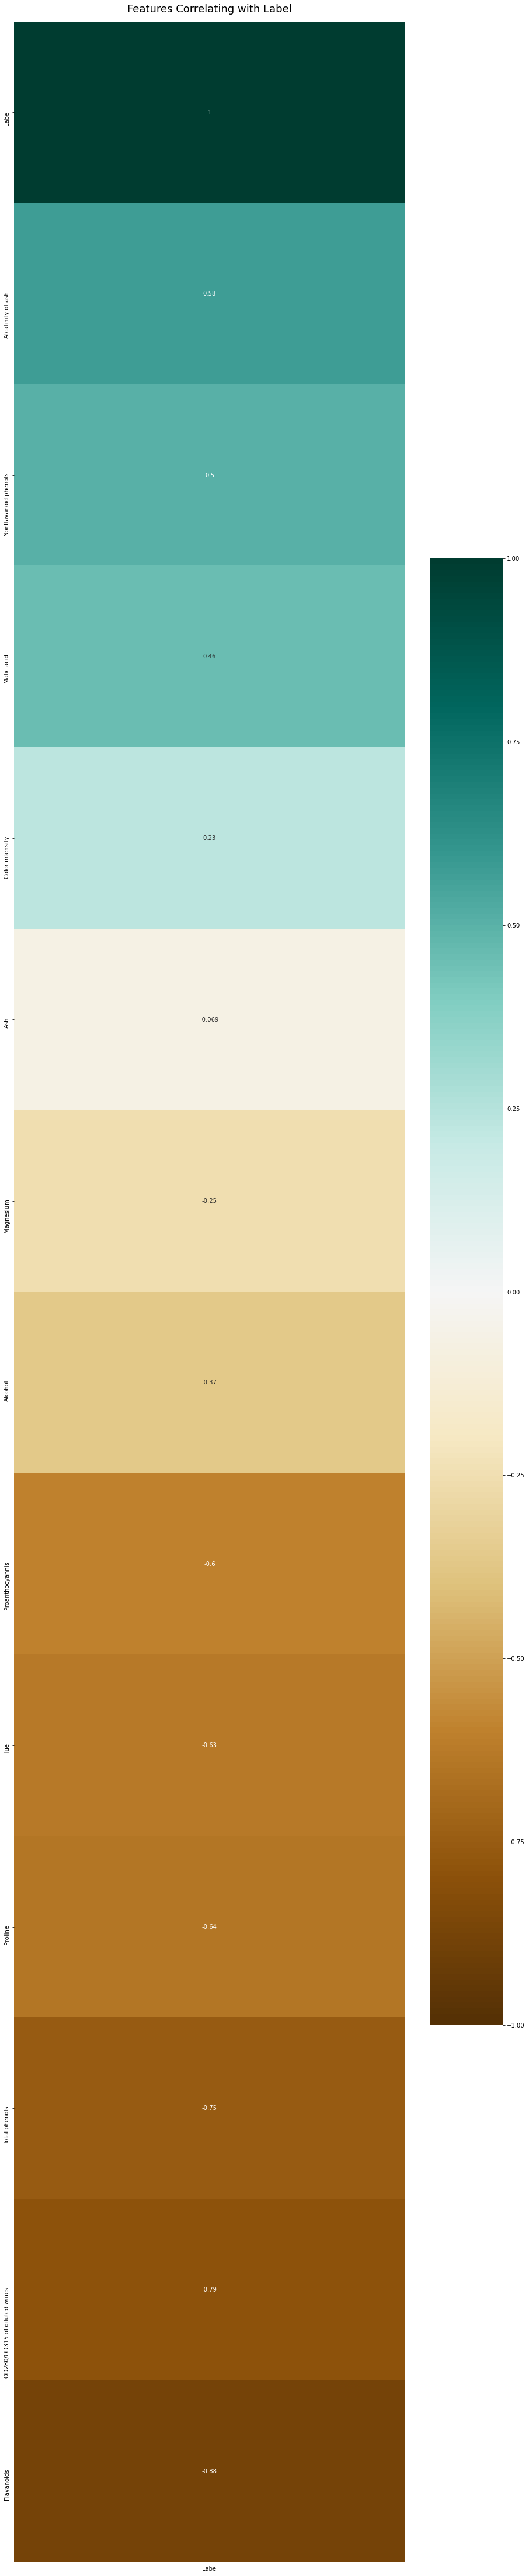

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 80))
heatmap = sns.heatmap(dataset2.corr()[['Label']].sort_values(by='Label', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Label', fontdict={'fontsize':18}, pad=16);

In [37]:
y=dataset2[['Label']]
x=dataset2.drop('Label',axis=1)

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=15,train_size=0.80)

In [53]:
from sklearn import tree

model=tree.DecisionTreeClassifier()
model=model.fit(x,y)
pred=model.predict(x_test)
model.score(x_test,y_test)

1.0

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



In [69]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(n_estimators=10)
model2=model2.fit(x,y)
pred2=model2.predict(x_test)
model2.score(x_test,y_test)
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



<ipython-input-69-5975f1e70572>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2=model2.fit(x,y)


In [63]:
from sklearn.svm import SVC
model3=SVC(C=19)
model3.fit(x,y)
model3.score(x_test,y_test)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.696969696969697

In [ ]:
from sklearn import linear_model

In [65]:
from sklearn.neighbors import KNeighborsClassifier
model4= KNeighborsClassifier(n_neighbors=10)
model4.fit(x_train,y_train)
model4.score(x_test,y_test)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.7272727272727273